In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score  #import the one the give accuracy!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [4]:
!pwd

/Users/alexandros.samartzis/Spiced_Academy/stationary-sriracha-student-code/week_4/spiced_encounters/4.8.class_imbalance


In [5]:
df = pd.read_csv('creditcard.csv')

In [6]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


1. $\color{yellow}{\text{EDA}}$

In [7]:
X = df.drop('Class',axis=1)
y = df['Class']

In [8]:
# check if is unbalanced
y.value_counts(normalize=True)    # is highly unbalanced!!!!!

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=42,stratify=y) # by stratify=y you request the keep inbalance of the previous line after spliting

In [10]:
ytrain.value_counts(normalize=True) 

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [11]:
ytest.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

2. $\color{yellow}{\text{Dummy Classifier}}$

In [12]:
dummy = DummyClassifier()

In [13]:
dummy.fit(Xtrain,ytrain)
dummy.score(Xtest,ytest)
ypred_dummy = dummy.predict(Xtest)

# Although it seems a goos score be careful
- - We take the score to be the value caunt of the inbalance/balance
- - happens becasue even if we make the prediction randomly we will get at least this number.
$\color{red}{\text{Accuracy is not a reasonable metric to find a well performing estimator}}$

In [14]:
def scoring_function(ytrue,ypred,estimator_name):
    print(f'Accuracy score of {estimator_name}: {round(accuracy_score(ytrue, ypred),3)}')
    print(f'Precision of {estimator_name}: {round(precision_score(ytrue, ypred),3)}')
    print(f'Recall of {estimator_name}: {round(recall_score(ytrue, ypred),3)}')
    print(f'F1 score of {estimator_name}: {round(f1_score(ytrue, ypred),3)}')
    cm = confusion_matrix(ytrue,ypred)
    disp = ConfusionMatrixDisplay(cm, display_labels = ['non-fraud', 'fraud'])
    disp.plot()

Accuracy score of Dummy: 0.998
Precision of Dummy: 0.0
Recall of Dummy: 0.0
F1 score of Dummy: 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


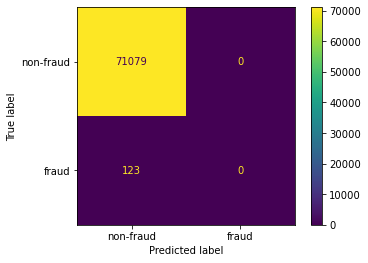

In [15]:
scoring_function(ytest, ypred_dummy, 'Dummy')

$\color{red}{\text{Random Forest Classifier}}$

In [16]:
rf_clf = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=21)

In [17]:
rf_clf.fit(Xtrain,ytrain)


RandomForestClassifier(max_depth=3, n_estimators=20, random_state=21)

Accuracy score of RandomForestClassifier: 0.999
Precision of RandomForestClassifier: 0.835
Recall of RandomForestClassifier: 0.659
F1 score of RandomForestClassifier: 0.736


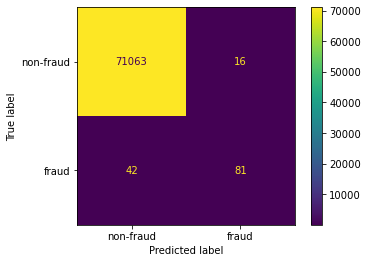

In [18]:
ypred_rf = rf_clf.predict(Xtest)
scoring_function(ytest,ypred_rf, 'RandomForestClassifier')

$\color{red}{\text{Random Forest Classifier- with balanced fixed by Normalizing with adding Weights}}$

In [19]:
rf_clf_bal = RandomForestClassifier(max_depth=3, n_estimators=20, random_state=21, class_weight='balanced')

In [20]:
rf_clf_bal.fit(Xtrain,ytrain)


RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=20,
                       random_state=21)

Accuracy score of RandomForestClassifier: 0.994
Precision of RandomForestClassifier: 0.196
Recall of RandomForestClassifier: 0.862
F1 score of RandomForestClassifier: 0.32


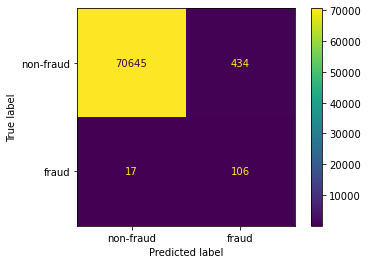

In [21]:
ypred_rf_bal = rf_clf_bal.predict(Xtest)
scoring_function(ytest,ypred_rf_bal, 'RandomForestClassifier')

 $\color{red}{\text{Sampling (Over- and Undersampling)}}$

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [23]:
rus = RandomUnderSampler(sampling_strategy=0.25)

In [24]:
Xtrain_rus, ytrain_rus = rus.fit_resample(Xtrain, ytrain)

In [25]:
ytrain_rus.value_counts(normalize=True)     # Removed highpopulation data until we reach the follow bablnce 20-80% compared to 99.8-0.2% of the starting point

0    0.8
1    0.2
Name: Class, dtype: float64

In [26]:
ytrain_rus.value_counts() 

0    1476
1     369
Name: Class, dtype: int64